In [1]:
from emukit.examples.multi_fidelity_dgp.baseline_model_wrappers import LinearAutoRegressiveModel
import numpy as np

import matplotlib.pyplot as plt

def f_high(x):
    return (6.*x-2)**2*np.sin(12.*x-4.)

def f_low(x):
    return f_high(x)*0.5+10.*x


num_cheap = 10
num_expensive = 5

np.random.seed(59)
X1 = np.random.rand(num_cheap)[:,None]
X2 = np.linspace(0,1,num_expensive)[:,None]
#X2 = np.random.rand(num_expensive)[:,None]
Yc = f_low(X1)

Ye = f_high(X2) + 0.00001 * np.random.normal(0,1,num_expensive)[:,None]

In [2]:
X=[]
X.append(X1)
X.append(X2)

Y=[]
Y.append(Yc)
Y.append(Ye)

In [3]:
m1 =  LinearAutoRegressiveModel(X, Y)
m1.optimize()

Optimization restart 1/10, f = 23.5692596615659
Optimization restart 2/10, f = 22.950878767617148
Optimization restart 3/10, f = 44.16518320632445
Optimization restart 4/10, f = 44.16518235507947
Optimization restart 5/10, f = 25.781610402569505
Optimization restart 6/10, f = 20.841694775429275
Optimization restart 7/10, f = 20.841694773260393
Optimization restart 8/10, f = 44.165182161449145
Optimization restart 9/10, f = 20.841694772128392
Optimization restart 10/10, f = 23.558228689798934
Optimization restart 1/10, f = 20.573476952952554


 /Users/felix/opt/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 2/10, f = 38.402110027755484
Optimization restart 3/10, f = 38.40211002190935
Optimization restart 4/10, f = 38.402110027750155
Optimization restart 5/10, f = 38.402110667367616


 /Users/felix/opt/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 6/10, f = 30.74351295474945
Optimization restart 7/10, f = 21.208605230739906
Optimization restart 8/10, f = 38.402110021688166
Optimization restart 9/10, f = 38.40211002170528
Optimization restart 10/10, f = 25.645998238220628


In [4]:
X_test = np.linspace(0,1,99)[:,None]

tmp = [1.]*99
tmp = np.array(tmp).reshape(-1,1)
#tmp.shape

X_test = np.hstack((X_test,tmp))

y_mean, y_var = m1.predict(X_test)

In [5]:
y_up = y_mean+1.96*np.sqrt(y_var)
y_down = y_mean - 1.96*np.sqrt(y_var)

X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot)
f_e=f_high(X_plot)

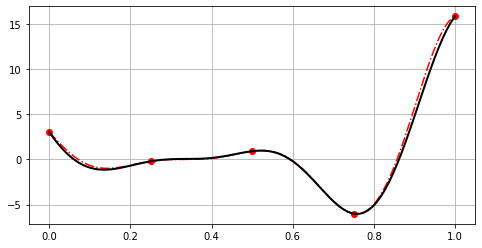

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test[:,0],y_mean,'k-',linewidth=2)
plt.fill_between(np.array(X_test[:,0]).flatten(),np.array(y_up).flatten(),np.array(y_down).flatten(),facecolor='g',alpha=0.3)
plt.grid()
plt.show()

In [8]:
fig.savefig('linearA_AR1.pdf', bbox_inches='tight')

In [9]:
%pylab inline
import pylab as pb
pylab.ion()
import GPy

Populating the interactive namespace from numpy and matplotlib


In [12]:
K1 = GPy.kern.Bias(1)
K2 = GPy.kern.Linear(1)
K3 = GPy.kern.Matern32(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2,K3])

m = GPy.models.GPCoregionalizedRegression([X1,X2],[Yc,Ye],kernel=lcm)
m['.*ICM.*var'].unconstrain()
m['.*ICM0.*var'].constrain_fixed(1.)
m['.*ICM0.*W'].constrain_fixed(0)
m['.*ICM1.*var'].constrain_fixed(1.)
m['.*ICM1.*W'].constrain_fixed(0)
m.optimize()

In [13]:
#m.optimize_restarts(num_restarts = 2)

In [14]:
Xt1 = np.random.rand(100)[:,None]*1.2
Xt2 = np.random.rand(100)[:,None]*1.2

Yt1 = f_low(Xt1)
Yt2 = f_high(Xt2)

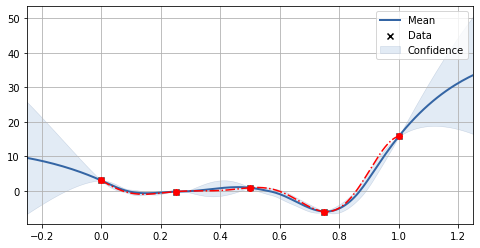

In [15]:
#fig = pb.figure(figsize=(8,4))
fig, ax = plt.subplots(figsize=(8, 4))
m.plot(fixed_inputs=[(1,1)],which_data_rows=slice(num_cheap,num_cheap+num_expensive),ax=ax)
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
plt.grid()

In [16]:
fig.savefig('linearA_LCM.pdf', bbox_inches='tight')